In [102]:
import numpy as np
import pandas as pd

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

In [103]:
train = pd.read_csv("/content/SalaryData_Train.csv.crdownload")

In [104]:
test = pd.read_csv("/content/SalaryData_Test.csv")

In [105]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12736,27,Private,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,50,United-States,<=50K
12737,48,Private,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
12738,31,Self-emp-inc,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,44,United-States,<=50K
12739,31,Private,1st-4th,2,Never-married,Other-service,Other-relative,White,Female,0,0,25,El-Salvador,<=50K


In [106]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            12741 non-null  int64 
 1   workclass      12741 non-null  object
 2   education      12741 non-null  object
 3   educationno    12741 non-null  int64 
 4   maritalstatus  12741 non-null  object
 5   occupation     12741 non-null  object
 6   relationship   12741 non-null  object
 7   race           12741 non-null  object
 8   sex            12741 non-null  object
 9   capitalgain    12741 non-null  int64 
 10  capitalloss    12741 non-null  int64 
 11  hoursperweek   12741 non-null  int64 
 12  native         12741 non-null  object
 13  Salary         12740 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.4+ MB


In [108]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,12741.000000,12741.000000,12741.000000,12741.000000,12741.000000
mean,38.359391,10.124088,1076.078251,89.353897,41.028491
std,13.088580,2.531913,7365.806668,404.272794,11.876268
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [109]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [110]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [111]:
test['maritalstatus'].value_counts()

 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64

In [112]:
train[train.duplicated()].shape

(752, 14)

In [113]:
train[train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12693,39,Private,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
12700,21,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,<=50K
12702,51,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
12718,35,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [114]:
Train=train.drop_duplicates()

In [115]:
Train.isnull().sum().sum()

1

In [116]:
Train = Train.dropna()

In [117]:
Train.isnull().sum().sum()

0

In [118]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12735,23,Private,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K
12736,27,Private,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,50,United-States,<=50K
12737,48,Private,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
12738,31,Self-emp-inc,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,44,United-States,<=50K


In [119]:
test[test.duplicated()].shape

(930, 14)

In [120]:
test[test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [121]:
Test=test.drop_duplicates()

In [122]:
Test.isnull().sum().sum()

0

In [123]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [124]:
Test.isnull().sum().sum()

0

In [125]:
Train['Salary'].value_counts()

 <=50K    8991
 >50K     2997
Name: Salary, dtype: int64

In [126]:
Test['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [127]:
pd.crosstab(Train['occupation'],Train['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,1328,201
Armed-Forces,2,0
Craft-repair,1115,350
Exec-managerial,818,752
Farming-fishing,357,44
Handlers-cleaners,466,36
Machine-op-inspct,660,107
Other-service,1251,58
Priv-house-serv,63,0


In [128]:
pd.crosstab(Train['workclass'],Train['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,236,148
Local-gov,610,248
Private,6776,1914
Self-emp-inc,206,238
Self-emp-not-inc,755,297
State-gov,406,152
Without-pay,2,0


In [129]:
pd.crosstab(Train['workclass'],Train['occupation'])

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,127,2,28,66,2,8,6,18,0,66,14,8,29,10
Local-gov,127,0,59,82,13,14,4,76,0,305,121,4,12,41
Private,1115,0,1093,1031,182,472,722,1086,63,880,80,1183,267,516
Self-emp-inc,14,0,37,165,17,1,8,10,0,59,2,117,1,13
Self-emp-not-inc,30,0,225,152,179,5,20,63,0,161,3,164,11,39
State-gov,116,0,23,74,6,2,7,56,0,183,49,3,29,10
Without-pay,0,0,0,0,2,0,0,0,0,0,0,0,0,0


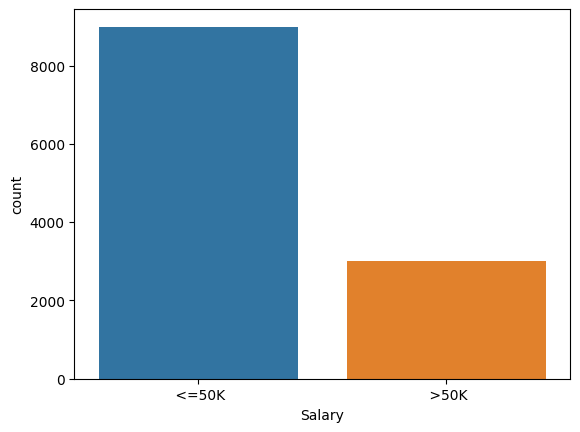

 <=50K    8991
 >50K     2997
Name: Salary, dtype: int64

In [130]:
sns.countplot(x='Salary',data= Train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Train['Salary'].value_counts()

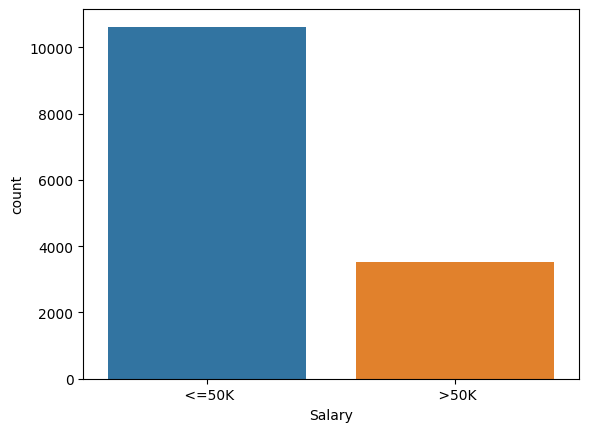

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [131]:
sns.countplot(x='Salary',data= Test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Test['Salary'].value_counts()

<Axes: xlabel='occupation', ylabel='workclass'>

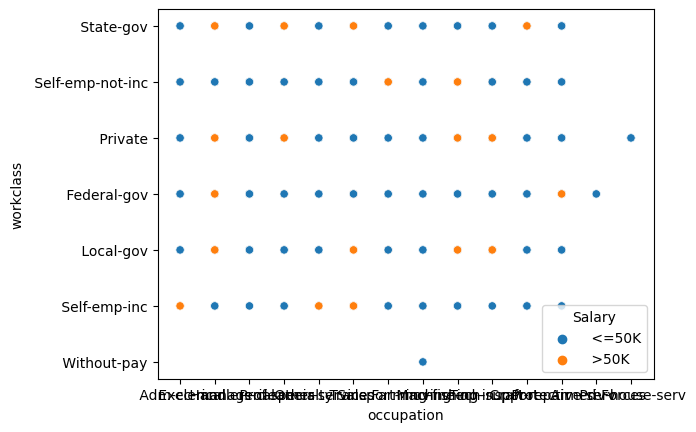

In [132]:
sns.scatterplot(x='occupation', y='workclass', hue='Salary', data=Train)


<Axes: xlabel='education'>

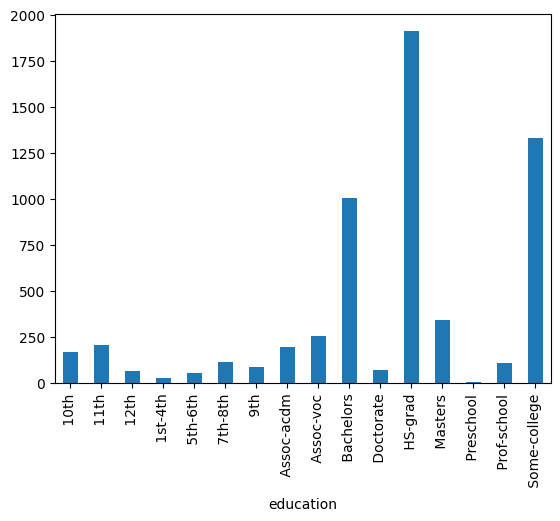

In [133]:
pd.crosstab(Train['Salary'],Train['education']).mean().plot(kind='bar')

<Axes: xlabel='occupation'>

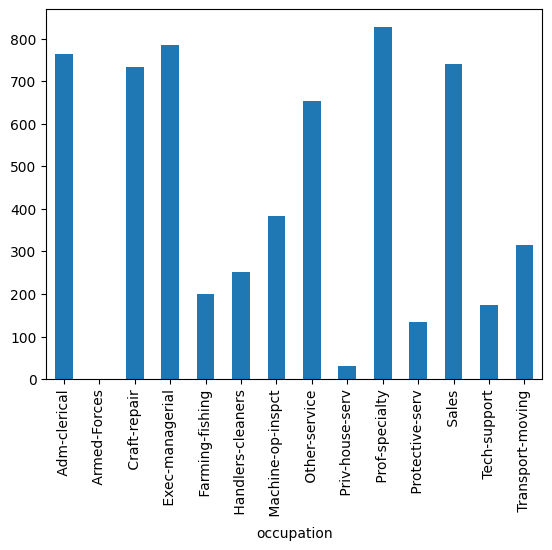

In [134]:
pd.crosstab(Train['Salary'],Train['occupation']).mean().plot(kind='bar')

<Axes: xlabel='workclass'>

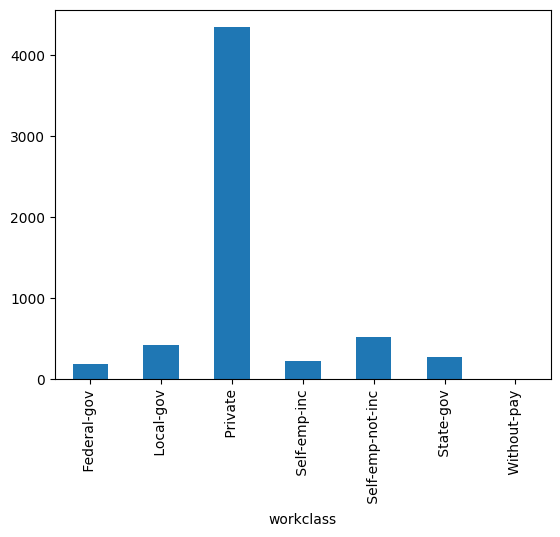

In [135]:
pd.crosstab(Train['Salary'],Train['workclass']).mean().plot(kind='bar')

<Axes: xlabel='sex'>

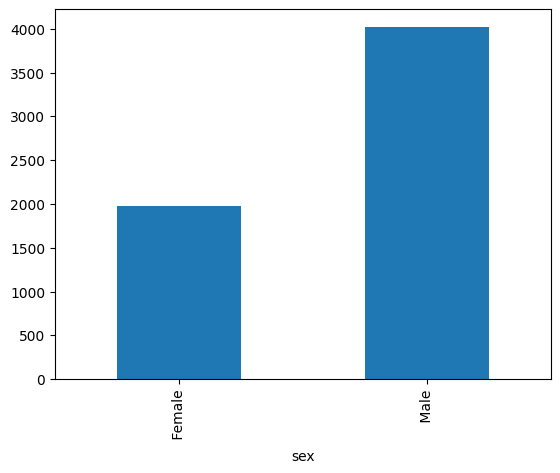

In [136]:
pd.crosstab(Train['Salary'],Train['sex']).mean().plot(kind='bar')

<Axes: xlabel='relationship'>

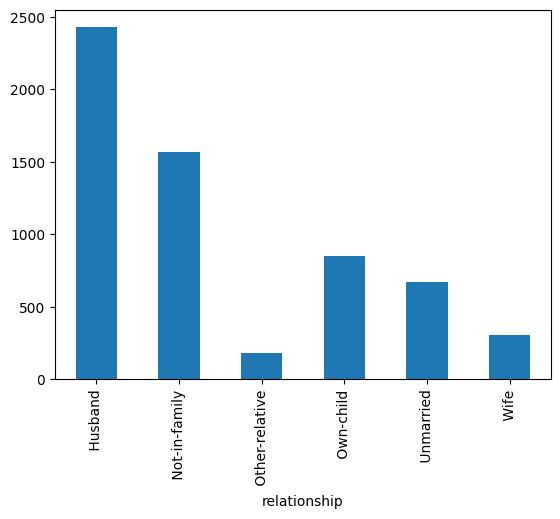

In [137]:
pd.crosstab(Train['Salary'],Train['relationship']).mean().plot(kind='bar')

In [138]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [139]:
number = LabelEncoder()
for i in string_columns:
        Train[i]= number.fit_transform(Train[i])
        Test[i]=number.fit_transform(Test[i])

<ipython-input-139-b2b754760780>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test[i]=number.fit_transform(Test[i])
<ipython-input-139-b2b754760780>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test[i]=number.fit_transform(Test[i])
<ipython-input-139-b2b754760780>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [140]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12735,23,2,15,10,4,11,3,4,0,0,0,40,37,<=50K
12736,27,2,11,9,4,0,1,4,1,0,0,50,37,<=50K
12737,48,2,15,10,4,5,1,4,1,0,0,40,37,<=50K
12738,31,3,11,9,4,2,1,4,1,0,0,44,37,<=50K


In [141]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [142]:
colnames=Train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [143]:
len(colnames)

14

In [144]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12735,23,2,15,10,4,11,3,4,0,0,0,40,37,<=50K
12736,27,2,11,9,4,0,1,4,1,0,0,50,37,<=50K
12737,48,2,15,10,4,5,1,4,1,0,0,40,37,<=50K
12738,31,3,11,9,4,2,1,4,1,0,0,44,37,<=50K


In [145]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [146]:
Test['maritalstatus'].value_counts()

2    6490
4    4501
0    2026
5     470
6     450
3     182
1      11
Name: maritalstatus, dtype: int64

In [147]:
x_train = Train[colnames[0:13]].values
y_train = Train[colnames[13]].values
x_test = Test[colnames[0:13]].values
y_test = Test[colnames[13]].values


In [148]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)


In [149]:
x_train

array([[39,  5,  9, ...,  0, 40, 37],
       [50,  4,  9, ...,  0, 13, 37],
       [38,  2, 11, ...,  0, 40, 37],
       ...,
       [48,  2, 15, ...,  0, 40, 37],
       [31,  3, 11, ...,  0, 44, 37],
       [31,  2,  3, ...,  0, 25,  7]])

In [150]:
x_test

array([[25,  2,  1, ...,  0, 40, 37],
       [38,  2, 11, ...,  0, 50, 37],
       [28,  1,  7, ...,  0, 40, 37],
       ...,
       [38,  2,  9, ...,  0, 50, 37],
       [44,  2,  9, ...,  0, 40, 37],
       [35,  3,  9, ...,  0, 60, 37]])

In [151]:
y_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [152]:
y_test

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [153]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

#Applying Naive Bayes for Classification**

In [154]:
from sklearn.naive_bayes import MultinomialNB as MB

M_model=MB()
train_pred_multi=M_model.fit(x_train,y_train).predict(x_train)
test_pred_multi=M_model.fit(x_train,y_train).predict(x_test)

In [155]:
train_acc_multi=np.mean(train_pred_multi==y_train)
train_acc_multi

0.75

In [156]:
test_acc_multi=np.mean(test_pred_multi==y_test)
test_acc_multi ## test acuracy 75.15

0.7515923566878981

In [157]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_multi)

In [158]:
confusion_matrix

array([[10620,     0],
       [ 3510,     0]])

In [159]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_pred_multi))

0.7515923566878981


In [160]:
from sklearn.naive_bayes import GaussianNB as GB
G_model=GB()
train_pred_gau=G_model.fit(x_train,y_train).predict(x_train)
test_pred_gau=G_model.fit(x_train,y_train).predict(x_test)

In [161]:
train_acc_gau=np.mean(train_pred_gau==y_train)
train_acc_gau ## train accuracy 79.33

0.7974641307974641

In [162]:
test_acc_gau=np.mean(test_pred_gau==y_test)
test_acc_gau ## test acuracy 79.57

0.7967445152158528

In [163]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_gau)

In [164]:
confusion_matrix

array([[10063,   557],
       [ 2315,  1195]])

In [165]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_pred_gau))

0.7967445152158528
